# Common Analysis - Forecasting and Visuals

This notebook focuses on the forecasting aspect of the common analysis. I have used the SARIMAX model for time-series forecasting

In [1]:
# Importing common libraries for this task.
# Pandas, Matplotlib, Statsmodels are libraries that you would need to install if you do not have them already.

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

Agriculture is the state's third-largest industry, contributing $1.8 billion per year to the Wyoming economy.

Wyoming's economy is heavily tied to mining and agriculture


In [2]:
# Load the yearly fire_season smoke estimates for prediction
df = pd.read_csv('fire_season_estimates.csv')

In [3]:
df.head()

,Fire_Year,Smoke_Estimate,Actual_Smoke,AQI
0,1963,5.890893,27.383960,NaN
1,1964,7.707583,28.119148,NaN
2,1965,32.840365,38.290024,NaN
3,1966,3.657418,26.480105,NaN
4,1967,2.210699,25.894638,NaN


In [4]:
df['Fire_Year'] = pd.to_datetime(df['Fire_Year'], format='%Y')
df.set_index('Fire_Year', inplace=True)

C:\Users\arjun\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\arjun\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\arjun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


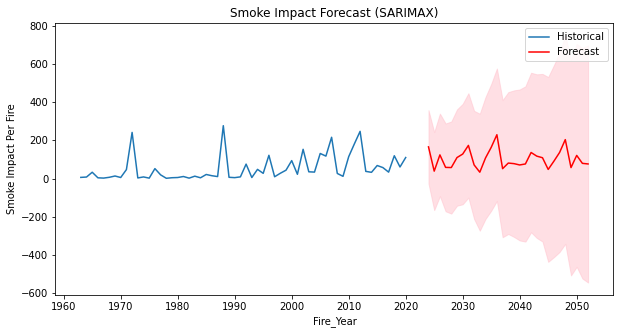

In [5]:
order = (2, 1, 0) 
seasonal_order = (1, 1, 1, 12) # Incorporating seasonal fluctuations
model = SARIMAX(df['Smoke_Estimate'], order=order, seasonal_order = seasonal_order)
results = model.fit()

# Forecast future values
forecast_steps = 29 # Data was only available until 2020. I forecast values from 2021 to 2049.
forecast = results.get_forecast(steps=forecast_steps) 
mean_forecast = forecast.predicted_mean # mean forecast values
confidence_intervals = forecast.conf_int() # By default, a 95% confidence interval is chosen

# Plot historical data and forecasts with confidence intervals
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Smoke_Estimate'], label='Historical')
plt.plot(mean_forecast.index, mean_forecast, label='Forecast', color='red')
plt.fill_between(mean_forecast.index,
                 confidence_intervals.iloc[:, 0],
                 confidence_intervals.iloc[:, 1], color='pink', alpha=0.5)
plt.xlabel('Fire_Year')
plt.ylabel('Smoke Impact Per Fire')
plt.title('Smoke Impact Forecast (SARIMAX)')
plt.legend()
plt.show()

C:\Users\arjun\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\arjun\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\arjun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


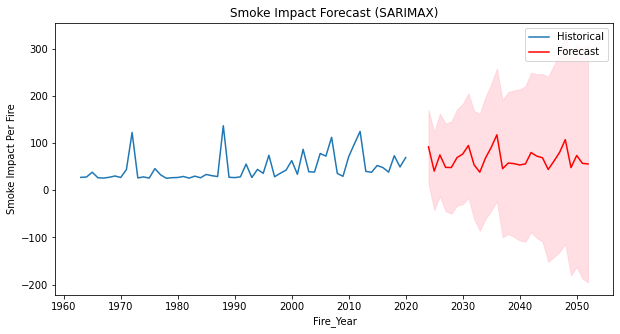

In [6]:
order = (2, 1, 0) 
seasonal_order = (1, 1, 1, 12) # Incorporating seasonal fluctuations
model = SARIMAX(df['Actual_Smoke'], order=order, seasonal_order = seasonal_order)
results = model.fit()

# Forecast future values
forecast_steps = 29 # Data was only available until 2020. I forecast values from 2021 to 2049.
forecast = results.get_forecast(steps=forecast_steps) 
mean_forecast = forecast.predicted_mean # mean forecast values
confidence_intervals = forecast.conf_int() # By default, a 95% confidence interval is chosen

# Plot historical data and forecasts with confidence intervals
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Actual_Smoke'], label='Historical')
plt.plot(mean_forecast.index, mean_forecast, label='Forecast', color='red')
plt.fill_between(mean_forecast.index,
                 confidence_intervals.iloc[:, 0],
                 confidence_intervals.iloc[:, 1], color='pink', alpha=0.5)
plt.xlabel('Fire_Year')
plt.ylabel('Smoke Impact Per Fire')
plt.title('Smoke Impact Forecast (SARIMAX)')
plt.legend()
plt.show()

# Visualization

In [13]:
viz_df = pd.read_csv('Final_Data.csv')

### Question 1:
Produce a histogram showing the number of fires occurring every 50 mile distance from your assigned city up to the max specified distance.

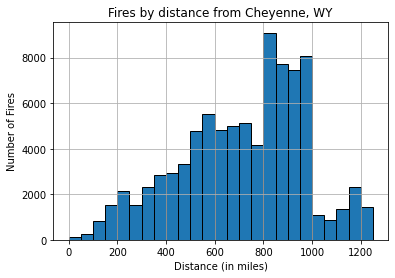

In [14]:
# Using bins for 50 mile increases in distance.
plt.hist(viz_df['Distance'], bins= range(0, 1300, 50), edgecolor='black')

plt.title('Fires by distance from Cheyenne, WY')
plt.xlabel('Distance (in miles)')
plt.ylabel('Number of Fires')
plt.grid(axis='both', alpha=1.0)
plt.savefig('Question_1.png')

plt.show()

### Question 2:
Produce a time series graph of total acres burned per year for the fires occurring in the specified distance from your city.

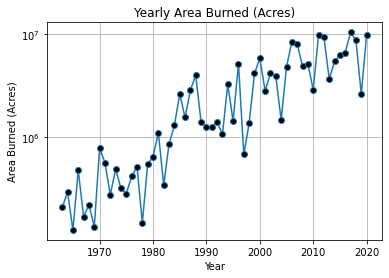

In [15]:
# Area burned yearly calculated
area_burned_yearly = viz_df.groupby('Fire_Year')['GIS_Acres'].sum()

# Graph for time series visualization
area_burned_yearly.plot(kind='line', marker='o', markerfacecolor = 'black', logy = 'sym')


plt.title('Yearly Area Burned (Acres)')
plt.xlabel('Year')
plt.ylabel('Area Burned (Acres)')
plt.grid(axis='both', alpha = 1.0)
plt.savefig('Question_2.png')

plt.show()

### Question 3:
Produce a time series graph containing your fire smoke estimate for your city and the AQI estimate for your city.

In [16]:
AQI_df = pd.read_csv("final_aqi_each_year.csv")

estimation_df = pd.read_csv("fire_season_estimates.csv")

from sklearn.preprocessing import MinMaxScaler
# Normalizing my smoke estimation scores
scaler = MinMaxScaler(feature_range=(0, 100))
estimation_df['Smoke_Estimate'] = scaler.fit_transform(estimation_df[['Smoke_Estimate']])

In [17]:
# Join the 2 datasets to get AQI and smoke estimation
aqi_and_estimation =  pd.merge(AQI_df, estimation_df, left_on='Year', right_on='Fire_Year', how='outer')

In [18]:
aqi_and_estimation.fillna(0)

,Year,AQI_x,unemp_rate,mine_log_con,civilian_labor,govt_education_providers,prof_business_emp,GDP(Inflation),Population,per_capita,employees_goods_production,employees_transportation,employees_trading,Fire_Year,Smoke_Estimate,Actual_Smoke,AQI_y
0,1984.0,20.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14704.0,0.0,0.0,0.0,1984,0.931895,26.521806,20.000000
1,1985.0,21.385965,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15413.0,0.0,0.0,0.0,1985,7.230676,33.531702,21.385965
2,1986.0,15.786885,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15748.0,0.0,0.0,0.0,1986,4.862524,30.896192,15.786885
3,1987.0,26.490000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15787.0,0.0,0.0,0.0,1987,3.254422,29.106540,26.490000
4,1988.0,16.546296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16403.0,0.0,0.0,0.0,1988,100.000000,136.774432,16.546296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1979,1.062510,26.667167,0.000000
57,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1980,1.457654,27.106922,0.000000
58,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1981,3.390786,29.258299,0.000000
59,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1982,0.279793,25.796083,0.000000


In [19]:
aqi_and_estimation.drop('Unnamed: 0', axis = 1, inplace = True)

KeyError: "['Unnamed: 0'] not found in axis"

In [20]:
final_table = pd.merge(viz_df, aqi_and_estimation, left_on='Fire_Year', right_on='Fire_Year', how='outer')

In [23]:
final_table.columns

Index(['Fire_Year', 'GIS_Acres', 'GIS_Hectares', 'Listed_Fire_Types',
       'Listed_Fire_Dates', 'Shape_Length', 'Shape_Area', 'Distance',
       'Start Date', 'End Date', 'Fire_Severity', 'Fire_Duration', 'Year',
       'AQI_x', 'unemp_rate', 'mine_log_con', 'civilian_labor',
       'govt_education_providers', 'prof_business_emp', 'GDP(Inflation)',
       'Population', 'per_capita', 'employees_goods_production',
       'employees_transportation', 'employees_trading', 'Smoke_Estimate',
       'Actual_Smoke', 'AQI_y'],
      dtype='object')

In [24]:
# Drop  duplicate columns
final_table['AQI_x'] = final_table['AQI_x'].fillna(0)
final_table['Smoke_Estimate'] = final_table['Smoke_Estimate'].fillna(0)

final_table['Year'] = pd.to_datetime(final_table['Fire_Year'], format='%Y')

final_table.head()

,Fire_Year,GIS_Acres,GIS_Hectares,Listed_Fire_Types,Listed_Fire_Dates,Shape_Length,Shape_Area,Distance,Start Date,End Date,...,prof_business_emp,GDP(Inflation),Population,per_capita,employees_goods_production,employees_transportation,employees_trading,Smoke_Estimate,Actual_Smoke,AQI_y
0,1963,40992.458271,16589.059302,"Wildfire (1), Likely Wildfire (3)",Listed Wildfire Discovery Date(s): 1963-08-06 ...,73550.428118,1.658906e+08,632.041602,1963-08-06,1963-12-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.706588,27.38396,NaN
1,1963,25757.090203,10423.524591,"Wildfire (2), Likely Wildfire (2)",Listed Wildfire Discovery Date(s): 1963-07-28 ...,59920.576713,1.042352e+08,661.238055,1963-07-28,2019-09-13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.706588,27.38396,NaN
2,1963,45527.210986,18424.208617,"Wildfire (6), Likely Wildfire (15)",Listed Wildfire Discovery Date(s): 1963-08-06 ...,84936.827810,1.842421e+08,625.424025,1963-08-06,1963-12-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.706588,27.38396,NaN
3,1963,10395.010334,4206.711433,"Wildfire (2), Likely Wildfire (3)",Listed Wildfire Discovery Date(s): 1963-08-06 ...,35105.903602,4.206711e+07,576.211068,1963-08-06,1963-12-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.706588,27.38396,NaN
4,1963,9983.605738,4040.221900,"Wildfire (1), Likely Wildfire (3)",Listed Wildfire Discovery Date(s): 1963-08-06 ...,26870.456126,4.040222e+07,620.880899,1963-08-06,1963-12-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.706588,27.38396,NaN


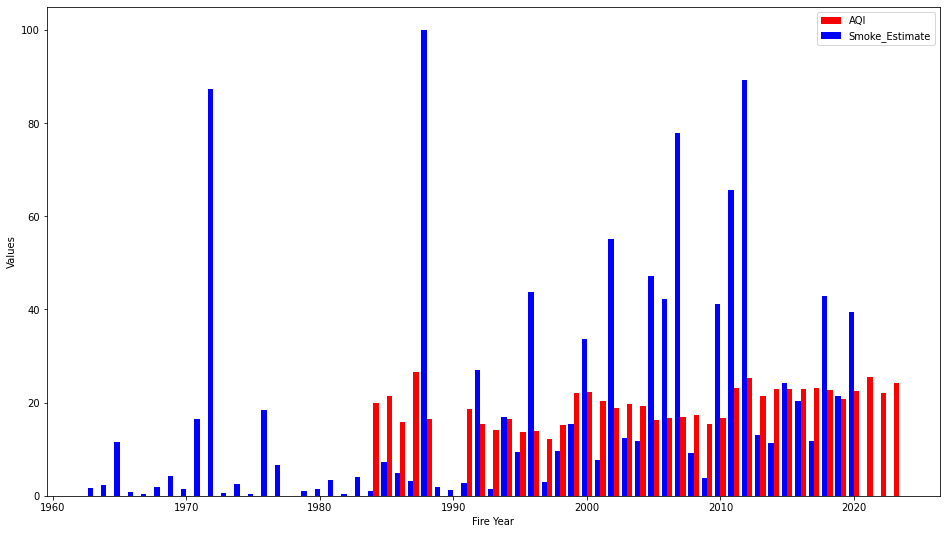

In [25]:
fig, ax = plt.subplots(figsize=(16, 9))

# Plot AQI
ax.bar(final_table['Fire_Year'] + 0.2, final_table['AQI_x'], width=0.4, color= 'red',  label='AQI')

# Plot Smoke Estimate
ax.bar(final_table['Fire_Year'] - 0.2, final_table['Smoke_Estimate'], width=0.4, color= 'blue', label='Smoke_Estimate')

ax.set_xlabel('Fire Year')
ax.set_ylabel('Values')
ax.legend()

plt.savefig('Question 3.png')

plt.show()